<a href="https://colab.research.google.com/github/zeerafle/monetary-policy-topic-extraction/blob/master/notebooks/Topic_Modelling_LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Archive/Documents/Kegiatan/Gemastik Data Mining 2022/GEMASTIK/Ekstraksi Topik/teks_laporan/clean_data.csv',
                 usecols=['triwulan', 'tahun', 'text'])
df.head()

,triwulan,tahun,text
0,III,2019,rapat dewan gubernur rdg bank indonesia novemb...
1,IV,2019,rapat dewan gubernur rdg bank indonesia februa...
2,I,2020,rapat dewan gubernur rdg bank indonesia mei pu...
3,II,2020,ekonomi global mulai tunjuk tanda tanda baik a...
4,III,2020,rapat dewan gubernur rdg bank indonesia novemb...


## Text Representation

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
docs = df.text.to_list()
docs[0]

'rapat dewan gubernur rdg bank indonesia november putus tahan bi day reverse repo rate bi drr besar suku bunga deposit facility besar suku bunga lending facility besar bijak moneter tetap akomodatif konsisten prakira inflasi kendali kisar target stabilitas eksternal jaga upaya jaga momentum tumbuh ekonomi domestik tengah ekonomi global lambat bank indonesia putus turun giro wajib minimum gwm rupiah bank umum konvensional bank umum syariah unit usaha syariah besar bps masing masing jadi gwm rerata masing masing tetap besar laku efektif januari bijak tempuh tambah sedia likuiditas perban tingkat biaya dukung tumbuh ekonomi strategi operasi moneter terus kuat jaga cukup likuiditas dukung transmisi baur bijak akomodatif instrumen baur bijak bank indonesia terus arah dorong tumbuh ekonomi bijak makroprudensial tetap akomodatif dorong salur kredit perban luas biaya ekonomi tetap tahan jaga stabilitas sistem uang jalan bank indonesia tahan rasio countercyclical capital buffer ccb besar rasio 

In [ ]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5)
features = tfidf.fit_transform(docs)

## Topic Modelling

In [ ]:
# !pip install pyLDAvis # visualizing topics
!pip install -U gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 74.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 KB 12.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for fst-pso: filename=fst_pso-1.8.1-py3-none-any.whl size=20443 sha256=5f19d46d5bfb414f1c42b21b342ca11f4623829626784b8e6ff296025d017e92
  Stored in directory: /root/.cache/pip/wheels/6a/65/c4/d27eeee9ba3fc150a0dae150519591103b9e0dbffde3ae77dc
  Created wheel for miniful: filename=miniful-0.0.6-py3-none-any.whl size=3530 sha256=1bb3871ea71f150d4185a85dca50669f92763a49ece6aca61081286f54a103d8
  Stored in directory: /root/.cache/pip/wheels/ba/d9/a0/ddd93af16d5855dd9bad417623e70948fdac119d1d34fb17c8
Successfully built fst-pso miniful
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.

In [ ]:
!pip install --upgrade numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 61.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scipy 1.7.3 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.24.1 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.1 which is incompatible.


In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import gensim
from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
from gensim.corpora import Dictionary
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

import matplotlib.pyplot as plt

In [ ]:
doc_token = [word_tokenize(t) for t in docs] # tokenizing
doc_token[0]

['rapat',
 'dewan',
 'gubernur',
 'rdg',
 'bank',
 'indonesia',
 'november',
 'putus',
 'tahan',
 'bi',
 'day',
 'reverse',
 'repo',
 'rate',
 'bi',
 'drr',
 'besar',
 'suku',
 'bunga',
 'deposit',
 'facility',
 'besar',
 'suku',
 'bunga',
 'lending',
 'facility',
 'besar',
 'bijak',
 'moneter',
 'tetap',
 'akomodatif',
 'konsisten',
 'prakira',
 'inflasi',
 'kendali',
 'kisar',
 'target',
 'stabilitas',
 'eksternal',
 'jaga',
 'upaya',
 'jaga',
 'momentum',
 'tumbuh',
 'ekonomi',
 'domestik',
 'tengah',
 'ekonomi',
 'global',
 'lambat',
 'bank',
 'indonesia',
 'putus',
 'turun',
 'giro',
 'wajib',
 'minimum',
 'gwm',
 'rupiah',
 'bank',
 'umum',
 'konvensional',
 'bank',
 'umum',
 'syariah',
 'unit',
 'usaha',
 'syariah',
 'besar',
 'bps',
 'masing',
 'masing',
 'jadi',
 'gwm',
 'rerata',
 'masing',
 'masing',
 'tetap',
 'besar',
 'laku',
 'efektif',
 'januari',
 'bijak',
 'tempuh',
 'tambah',
 'sedia',
 'likuiditas',
 'perban',
 'tingkat',
 'biaya',
 'dukung',
 'tumbuh',
 'ekonomi',


In [ ]:
bigram = gensim.models.Phrases(doc_token)
doc_token_bigram = [bigram[line] for line in doc_token]

In [ ]:
doc_token_bigram

[['rapat_dewan',
  'gubernur_rdg',
  'bank_indonesia',
  'november',
  'putus_tahan',
  'bi_day',
  'reverse_repo',
  'rate_bi',
  'drr_besar',
  'suku_bunga',
  'deposit_facility',
  'besar',
  'suku_bunga',
  'lending_facility',
  'besar',
  'bijak_moneter',
  'tetap',
  'akomodatif',
  'konsisten',
  'prakira',
  'inflasi',
  'kendali',
  'kisar_target',
  'stabilitas_eksternal',
  'jaga',
  'upaya',
  'jaga',
  'momentum_tumbuh',
  'ekonomi',
  'domestik',
  'tengah',
  'ekonomi',
  'global',
  'lambat',
  'bank_indonesia',
  'putus',
  'turun',
  'giro',
  'wajib',
  'minimum',
  'gwm',
  'rupiah',
  'bank',
  'umum',
  'konvensional',
  'bank',
  'umum',
  'syariah',
  'unit',
  'usaha',
  'syariah',
  'besar_bps',
  'masing_masing',
  'jadi',
  'gwm',
  'rerata',
  'masing_masing',
  'tetap',
  'besar',
  'laku',
  'efektif',
  'januari',
  'bijak',
  'tempuh',
  'tambah',
  'sedia_likuiditas',
  'perban',
  'tingkat',
  'biaya',
  'dukung',
  'tumbuh',
  'ekonomi',
  'strategi_

In [ ]:
# Next we need to format out text so iy can be read by gensim, we define a dictionary and a corpus
dictionary = Dictionary(doc_token_bigram)
corpus = [dictionary.doc2bow(text) for text in doc_token_bigram]

In [ ]:
corpus[0][:6]

[(0, 1), (1, 1), (2, 3), (3, 3), (4, 1), (5, 5)]

In [ ]:
#function to compute coherence values
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=40,iterations=200,  chunksize = 10000)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        
    return model_list, coherence_values

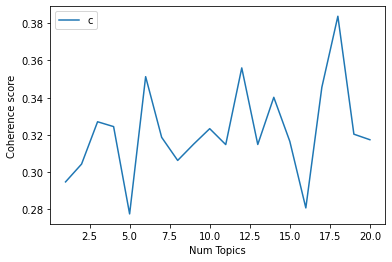

In [ ]:
start=1
limit=21
step=1
model_list, coherence_values = compute_coherence_values(dictionary, corpus=corpus, 
                                                        texts=doc_token_bigram, start=start, limit=limit, step=step)
#show graphs
import matplotlib.pyplot as plt
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 6))

Num Topics = 1  has Coherence Value of 0.294803
Num Topics = 2  has Coherence Value of 0.304358
Num Topics = 3  has Coherence Value of 0.327069
Num Topics = 4  has Coherence Value of 0.324473
Num Topics = 5  has Coherence Value of 0.27762
Num Topics = 6  has Coherence Value of 0.351269
Num Topics = 7  has Coherence Value of 0.318711
Num Topics = 8  has Coherence Value of 0.30632
Num Topics = 9  has Coherence Value of 0.315094
Num Topics = 10  has Coherence Value of 0.323363
Num Topics = 11  has Coherence Value of 0.314819
Num Topics = 12  has Coherence Value of 0.355965
Num Topics = 13  has Coherence Value of 0.314881
Num Topics = 14  has Coherence Value of 0.340196
Num Topics = 15  has Coherence Value of 0.316551
Num Topics = 16  has Coherence Value of 0.280839
Num Topics = 17  has Coherence Value of 0.345566
Num Topics = 18  has Coherence Value of 0.38369
Num Topics = 19  has Coherence Value of 0.320403
Num Topics = 20  has Coherence Value of 0.317427


In [ ]:
# Here is how you use the lsimodel

lsimodel = LsiModel(corpus=corpus, num_topics=5, id2word=dictionary)
lsimodel.show_topics(num_topics=5)

[(0,
  '0.299*"ekonomi" + 0.251*"tumbuh" + 0.244*"besar" + 0.225*"bank_indonesia" + 0.208*"tingkat" + 0.207*"tetap" + 0.199*"baik" + 0.170*"dorong" + 0.169*"lanjut" + 0.164*"yoy"'),
 (1,
  '-0.265*"ekonomi" + -0.256*"tumbuh" + -0.245*"tetap" + 0.182*"besar" + 0.153*"rp_triliun" + -0.147*"pengaruh" + -0.140*"indonesia" + 0.135*"lanjut" + -0.132*"turun" + -0.128*"jaga"'),
 (2,
  '0.287*"baik" + 0.235*"oktober" + 0.211*"dorong" + 0.211*"lanjut" + -0.169*"tetap" + -0.155*"tingkat" + -0.144*"laku" + 0.143*"pulih_ekonomi" + -0.141*"naik" + 0.140*"kuat"'),
 (3,
  '0.387*"tingkat" + -0.232*"besar" + -0.209*"tahun" + -0.170*"laku" + -0.167*"januari" + -0.152*"bank" + 0.141*"lebih_rendah" + -0.138*"indonesia" + 0.136*"lanjut" + 0.134*"prakira"'),
 (4,
  '-0.340*"maret" + -0.301*"april" + 0.221*"oktober" + 0.174*"september" + 0.169*"lanjut" + 0.169*"tetap" + 0.153*"kredit" + -0.131*"bulan" + -0.126*"triwulan_i" + -0.126*"jalan"')]

In [ ]:
# Here is how you use the ldamodel

ldamodel = LdaModel(corpus=corpus, num_topics=18, id2word=dictionary, passes=40,iterations=200,  chunksize = 10000,)
ldamodel.show_topics()

[(2,
  '0.001*"cenderung" + 0.001*"busn" + 0.001*"disiplin" + 0.001*"diri" + 0.001*"dasar_kredit" + 0.001*"currency" + 0.001*"cpo" + 0.001*"commerce" + 0.001*"cinta" + 0.001*"ebijakan"'),
 (4,
  '0.001*"besar" + 0.001*"ekonomi" + 0.001*"dorong" + 0.001*"lanjut" + 0.001*"tumbuh" + 0.001*"prakira" + 0.001*"bank_indonesia" + 0.001*"baik" + 0.001*"tetap" + 0.001*"dukung"'),
 (11,
  '0.001*"tingkat" + 0.001*"tumbuh" + 0.001*"ekonomi" + 0.001*"dorong" + 0.001*"besar" + 0.001*"bank_indonesia" + 0.001*"baik" + 0.001*"lanjut" + 0.001*"kuat" + 0.001*"dukung"'),
 (13,
  '0.001*"dorong" + 0.001*"besar" + 0.001*"lanjut" + 0.001*"baik" + 0.001*"tumbuh" + 0.001*"ekonomi" + 0.001*"dukung" + 0.001*"januari" + 0.001*"pulih_ekonomi" + 0.001*"tinggi"'),
 (5,
  '0.001*"tingkat" + 0.001*"lanjut" + 0.001*"ekonomi" + 0.001*"bank_indonesia" + 0.001*"tetap" + 0.001*"dorong" + 0.001*"baik" + 0.001*"tumbuh" + 0.001*"kredit" + 0.001*"besar"'),
 (15,
  '0.001*"tumbuh" + 0.001*"tetap" + 0.001*"ekonomi" + 0.001*"besa

In [ ]:
# Here is a visualization of the LDA topics
pyLDAvis.enable_notebook()
gensimvis.prepare(ldamodel,corpus,dictionary,mds='tsne')

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:827: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by defau

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
6      12.476386  21.314489       1        1  86.419930
10    -52.778774  53.617561       2        1   9.148818
9      18.721022  56.589184       3        1   2.787575
1      46.141033  27.913752       4        1   1.572513
16     22.451477  -7.324051       5        1   0.005083
15    -14.613425  34.742813       6        1   0.005083
14    -41.065746  20.553501       7        1   0.005083
13     32.631145 -47.710770       8        1   0.005083
12     -9.715158 -65.350708       9        1   0.005083
11      3.187571 -30.696495      10        1   0.005083
0     -77.629097 -17.928160      11        1   0.005083
8     -17.986679  68.631378      12        1   0.005083
7     -13.023953  -1.018700      13        1   0.005083
5      55.322254 -11.777896      14        1   0.005083
4     -45.792812  -9.629042      15        1   0.005083
3     -76.011116  20.829033      16        1   0.005083
2     -55.133263 -51.847134      17        1   0.005083
17    -27.017954 -33.631409      18        1   0.005083, topic_info=               Term        Freq       Total Category  logprob  loglift
105         ekonomi  283.000000  283.000000  Default  30.0000  30.0000
38            besar  219.000000  219.000000  Default  29.0000  29.0000
29   bank_indonesia  206.000000  206.000000  Default  28.0000  28.0000
366          tumbuh  238.000000  238.000000  Default  27.0000  27.0000
348           tetap  194.000000  194.000000  Default  26.0000  26.0000
..              ...         ...         ...      ...      ...      ...
277         prakira    0.000534  125.339959  Topic18  -7.2085  -2.4788
177           kisar    0.000534   35.917510  Topic18  -7.2085  -1.2290
26    banding_level    0.000534   22.897481  Topic18  -7.2085  -0.7788
76           dampak    0.000534   52.982639  Topic18  -7.2085  -1.6178
5        akomodatif    0.000534   41.827562  Topic18  -7.2085  -1.3813

[1157 rows x 6 columns], token_table=      Topic      Freq                 Term
term                                      
0         1  0.879949  administered_prices
0         2  0.109994  administered_prices
1         1  0.957916              agregat
2         1  0.858638              agustus
2         3  0.156116              agustus
...     ...       ...                  ...
1080      4  1.058587                yield
387       1  0.881727                  yoy
387       2  0.105281                  yoy
387       3  0.013160                  yoy
1004      1  0.991008            yoy_capai

[534 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 11, 10, 2, 17, 16, 15, 14, 13, 12, 1, 9, 8, 6, 5, 4, 3, 18])

In [ ]:
for i in range(13):
    print(ldamodel[corpus[i]])

[(6, 0.999043)]
[(6, 0.999016)]
[(6, 0.99910456)]
[(9, 0.9976209)]
[(10, 0.9992122)]
[(6, 0.99932766)]
[(1, 0.16810401), (6, 0.83122504)]
[(6, 0.9991974)]
[(6, 0.91327554), (10, 0.085969135)]
[(6, 0.9993785)]
[(6, 0.9992225)]
[(6, 0.99902815)]
[(6, 0.99884796)]


In [ ]:
ldamodel.show_topics(num_topics=18)

[(0,
  '0.001*"ekonomi" + 0.001*"baik" + 0.001*"tumbuh" + 0.001*"bank_indonesia" + 0.001*"tetap" + 0.001*"besar" + 0.001*"triwulan_ii" + 0.001*"pandemi_covid" + 0.001*"jaga" + 0.001*"global"'),
 (1,
  '0.029*"maret" + 0.023*"sbdk" + 0.019*"lebih_tinggi" + 0.019*"bps" + 0.017*"april" + 0.015*"baik" + 0.015*"besar_bps" + 0.013*"laku" + 0.011*"besar" + 0.011*"kira"'),
 (2,
  '0.001*"cenderung" + 0.001*"busn" + 0.001*"disiplin" + 0.001*"diri" + 0.001*"dasar_kredit" + 0.001*"currency" + 0.001*"cpo" + 0.001*"commerce" + 0.001*"cinta" + 0.001*"ebijakan"'),
 (3,
  '0.001*"cenderung" + 0.001*"busn" + 0.001*"disiplin" + 0.001*"diri" + 0.001*"dasar_kredit" + 0.001*"currency" + 0.001*"cpo" + 0.001*"commerce" + 0.001*"cinta" + 0.001*"ebijakan"'),
 (4,
  '0.001*"besar" + 0.001*"ekonomi" + 0.001*"dorong" + 0.001*"lanjut" + 0.001*"tumbuh" + 0.001*"prakira" + 0.001*"bank_indonesia" + 0.001*"baik" + 0.001*"tetap" + 0.001*"dukung"'),
 (5,
  '0.001*"tingkat" + 0.001*"lanjut" + 0.001*"ekonomi" + 0.001*"ban